In [1]:
import pandas as pd
import seaborn as sns
import json
import wordcloud

### Sources -
* http://data.gov.in
* https://raw.githubusercontent.com/datameet/railways/master/stations.json

In [36]:
%matplotlib inline

In [5]:
df = pd.read_csv("Train_details_22122017.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (0,2,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
df.describe()

,Train No,Train Name,SEQ,Station Code,Station Name,Arrival time,Departure Time,Distance,Source Station,Source Station Name,Destination Station,Destination Station Name
count,186124,186124,186124,186124,186124,186119,186119,186119,186114,186114,186114,186114
unique,11115,7585,235,8151,8100,1443,1444,3829,926,921,928,923
top,53041,MSB-TBM EMU,1,CSMT,CST-MUMBAI,00:00:00,00:00:00,0,HWH,HOWRAH JN.,HWH,HOWRAH JN.
freq,118,2436,7186,1027,1027,2002,1969,7191,7977,7977,7840,7840


In [10]:
df.dtypes

Train No                    object
Train Name                  object
SEQ                         object
Station Code                object
Station Name                object
Arrival time                object
Departure Time              object
Distance                    object
Source Station              object
Source Station Name         object
Destination Station         object
Destination Station Name    object
dtype: object

In [12]:
df.head()

,Train No,Train Name,SEQ,Station Code,Station Name,Arrival time,Departure Time,Distance,Source Station,Source Station Name,Destination Station,Destination Station Name
0,107,SWV-MAO-VLNK,1,SWV,SAWANTWADI R,00:00:00,10:25:00,0,SWV,SAWANTWADI ROAD,MAO,MADGOAN JN.
1,107,SWV-MAO-VLNK,2,THVM,THIVIM,11:06:00,11:08:00,32,SWV,SAWANTWADI ROAD,MAO,MADGOAN JN.
2,107,SWV-MAO-VLNK,3,KRMI,KARMALI,11:28:00,11:30:00,49,SWV,SAWANTWADI ROAD,MAO,MADGOAN JN.
3,107,SWV-MAO-VLNK,4,MAO,MADGOAN JN.,12:10:00,00:00:00,78,SWV,SAWANTWADI ROAD,MAO,MADGOAN JN.
4,108,VLNK-MAO-SWV,1,MAO,MADGOAN JN.,00:00:00,20:30:00,0,MAO,MADGOAN JN.,SWV,SAWANTWADI ROAD


In [13]:
df_stn = pd.read_json("https://raw.githubusercontent.com/datameet/railways/master/stations.json")

In [16]:
df_stn.count()

features    8990
type        8990
dtype: int64

### Top 50 stations with highest numbers of train arrival

In [43]:
grp_df = df[["Destination Station", "Train No"]].groupby("Destination Station")

In [44]:
station_train_info = grp_df.count().reset_index()

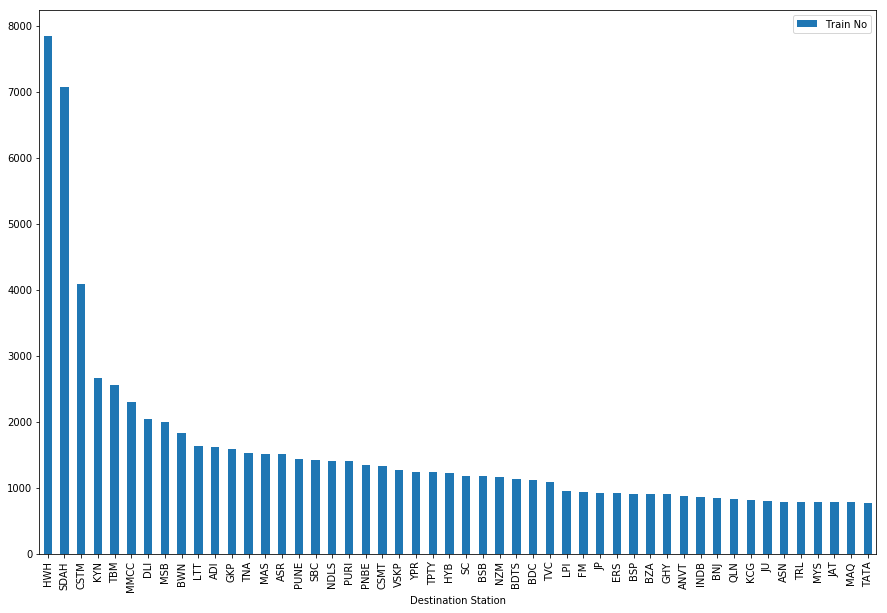

In [45]:
station_train_info.sort_values("Train No", ascending=False)[0:50].set_index("Destination Station").plot.bar(figsize=(15,10))

 ### Top 50 stations with highest numbers of train departure

In [39]:
grp_df = df[["Source Station", "Train No"]].groupby("Source Station")

In [40]:
station_train_info = grp_df.count().reset_index()

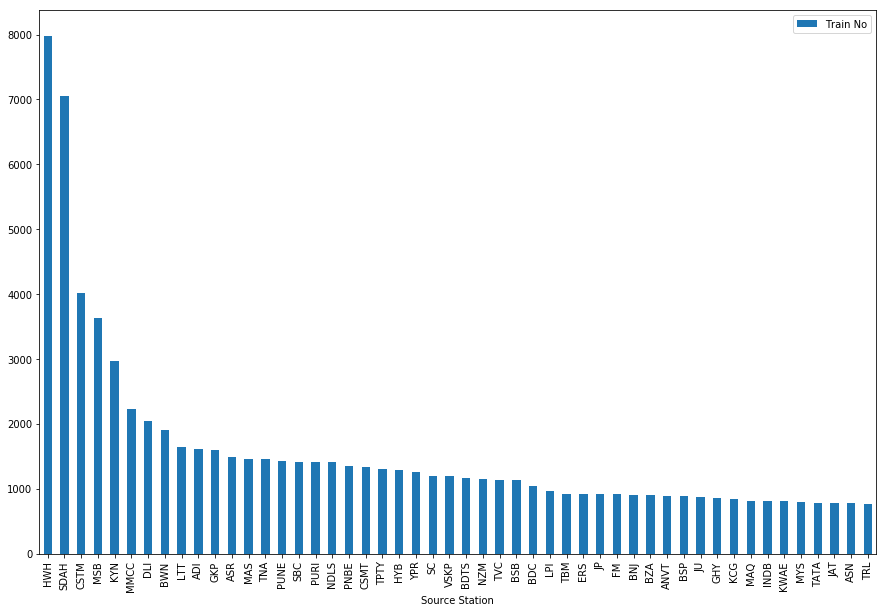

In [42]:
station_train_info.sort_values("Train No", ascending=False)[0:50].set_index("Source Station").plot.bar(figsize=(15,10))

## Checking longest running trains

In [83]:
grp_df = df[["Train No", "Distance"]].groupby("Train No")

In [84]:
station_train_info = grp_df.max().reset_index()

In [85]:
findf = station_train_info[station_train_info["Distance"] != 'SOLAPUR']

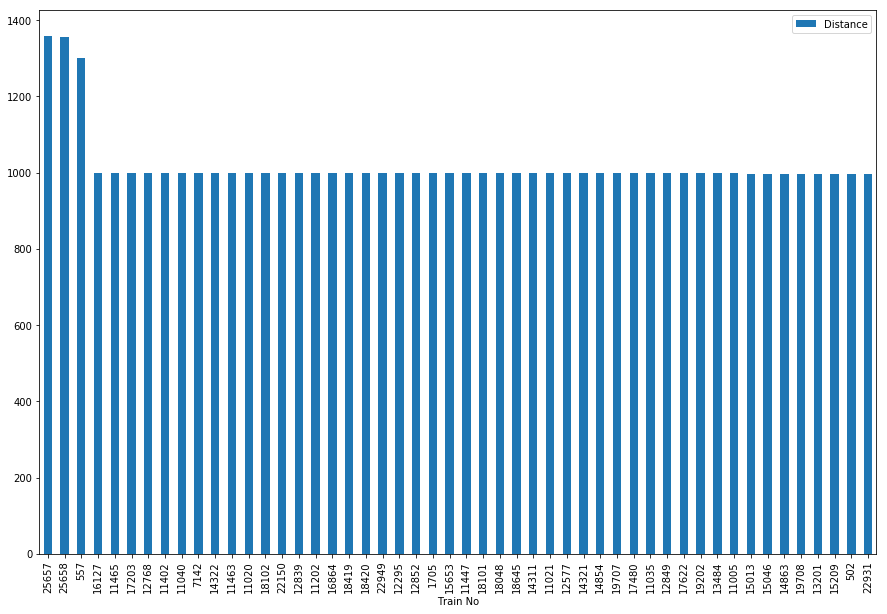

In [78]:
findf.sort_values("Distance", ascending=False)[0:50].set_index("Train No").plot.bar(figsize=(15,10))

In [90]:
df.head()

,Train No,Train Name,SEQ,Station Code,Station Name,Arrival time,Departure Time,Distance,Source Station,Source Station Name,Destination Station,Destination Station Name
0,107,SWV-MAO-VLNK,1,SWV,SAWANTWADI R,00:00:00,10:25:00,0,SWV,SAWANTWADI ROAD,MAO,MADGOAN JN.
1,107,SWV-MAO-VLNK,2,THVM,THIVIM,11:06:00,11:08:00,32,SWV,SAWANTWADI ROAD,MAO,MADGOAN JN.
2,107,SWV-MAO-VLNK,3,KRMI,KARMALI,11:28:00,11:30:00,49,SWV,SAWANTWADI ROAD,MAO,MADGOAN JN.
3,107,SWV-MAO-VLNK,4,MAO,MADGOAN JN.,12:10:00,00:00:00,78,SWV,SAWANTWADI ROAD,MAO,MADGOAN JN.
4,108,VLNK-MAO-SWV,1,MAO,MADGOAN JN.,00:00:00,20:30:00,0,MAO,MADGOAN JN.,SWV,SAWANTWADI ROAD


In [92]:
    df[df["Train No"] == 16318]

,Train No,Train Name,SEQ,Station Code,Station Name,Arrival time,Departure Time,Distance,Source Station,Source Station Name,Destination Station,Destination Station Name


In [101]:
grpd_df = df[["Train No", "Arrival time", "Departure Time"]][df["Train No"] != "K"].groupby("Train No")

In [103]:
grpd_df.max()

,Arrival time,Departure Time
Train No,,
22989,23:58:00,23:59:00
22990,23:50:00,23:55:00
22991,23:00:00,23:02:00
22992,23:14:00,23:19:00
22993,22:47:00,22:49:00
22994,22:50:00,22:52:00
22995,09:50:00,09:50:00
22996,23:40:00,23:40:00
23141,05:05:00,05:05:00
